### Media Company Case Study

#### Problem Statement:
A digital media company (similar to Voot, Hotstar, Netflix, etc.) had launched a show. Initially, the show got a good response, but then witnessed a decline in viewership. The company wants to figure out what went wrong.

`Approach`:

We are concerned about determining the driver variable for show viewership. We are interested in predicting the key driver variables and their impact rather than forcasting the results.

What could be potential reasons for the decline in viewershp?

The potential reasons could be:

- Decline in the number of people coming to the platform
- Fewer people watching the video
- A Decrease in marketing spend?
- Competitive shows, e.g. cricket/ IPL
- Special holidays
- Twist in the story

`Data Description`:
- Views_show : Number of times the show was viewed
- Visitors : Number of visitors who browsed the platform, but not necessarily watched a video.
- Views_platform : Number of times a video was viewed on the platform
- Ad_impression : Proxy for marketing budget. Represents number of impressions generated by ads
- Cricket_match_india: If a cricket match was being played. 1 indicates match on a given day, 0 indicates there wasn't
- Character_A : Describes presence of Character A. 1 indicates character A was in the episode, 0 indicates they weren't.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [ ]:
#Importing dataset
media = pd.DataFrame(pd.read_csv("mediacompany.csv"))
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [ ]:
# Checking Duplicates
sum(media.duplicated(subset = 'Date')) == 0
# No duplicate values

True

In [ ]:
# Dropping the unwanted column
media = media.drop('Unnamed: 7',axis = 1)

In [ ]:
media.shape

(80, 7)

In [ ]:
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 80 non-null     object
 1   Views_show           80 non-null     int64 
 2   Visitors             80 non-null     int64 
 3   Views_platform       80 non-null     int64 
 4   Ad_impression        80 non-null     int64 
 5   Cricket_match_india  80 non-null     int64 
 6   Character_A          80 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 4.5+ KB


In [ ]:
media.describe()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
count,80.000000,8.000000e+01,8.000000e+01,8.000000e+01,80.000000,80.000000
mean,289902.625000,1.699066e+06,2.222401e+06,1.442374e+09,0.100000,0.375000
std,154924.323585,2.311571e+05,2.913510e+05,2.983186e+08,0.301893,0.487177
min,102520.000000,1.248183e+06,1.690727e+06,1.010868e+09,0.000000,0.000000
25%,185353.250000,1.550766e+06,2.010816e+06,1.207911e+09,0.000000,0.000000
50%,235807.000000,1.698843e+06,2.226270e+06,1.385931e+09,0.000000,0.000000
75%,350079.000000,1.817895e+06,2.388837e+06,1.632416e+09,0.000000,1.000000
max,758631.000000,2.344650e+06,3.064422e+06,2.424203e+09,1.000000,1.000000


In [ ]:
# Checking Null values
media.isnull().sum()*100/media.shape[0]
# There are no NULL values in the dataset, hence it is clean.

Date                   0.0
Views_show             0.0
Visitors               0.0
Views_platform         0.0
Ad_impression          0.0
Cricket_match_india    0.0
Character_A            0.0
dtype: float64

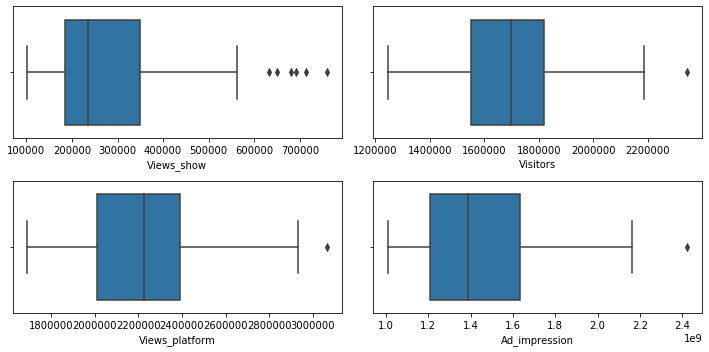

In [ ]:
# Outlier Analysis
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(media['Views_show'], ax = axs[0,0])
plt2 = sns.boxplot(media['Visitors'], ax = axs[0,1])
plt3 = sns.boxplot(media['Views_platform'], ax = axs[1,0])
plt4 = sns.boxplot(media['Ad_impression'], ax = axs[1,1])

plt.tight_layout()

In [ ]:
# Converting date to Pandas datetime format
media['Date'] = pd.to_datetime(media['Date'], dayfirst = False )
# Date is in the format YYYY-MM-DD

In [ ]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [ ]:
# Let's derive day of week column from date
media['Day_of_week'] = media['Date'].dt.dayofweek
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day_of_week
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,2
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,3
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,4
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,5
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,6


### EDA

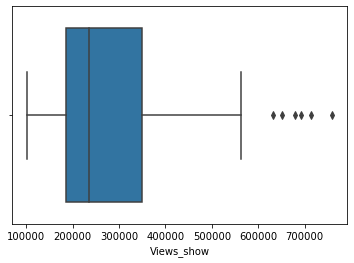

In [ ]:
sns.boxplot(media['Views_show'])

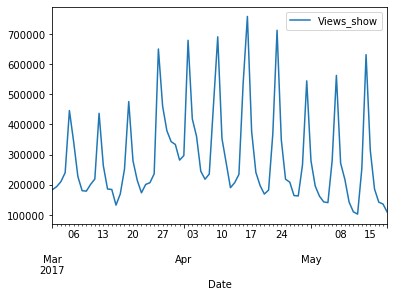

In [ ]:
# days vs Views_show
media.plot.line(x='Date', y='Views_show')

There seems to be a pattern. Let's take a closer look.

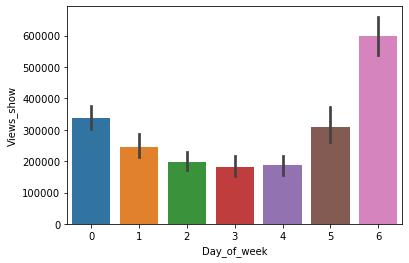

In [ ]:
sns.barplot(data = media,x='Day_of_week', y='Views_show')

Views are more on the weekends and decline on subsequent days.
The weekends seem to create an impact so lets do some feature engineering

In [ ]:
d = {5:1, 6:1, 0:0, 1:0, 2:0, 3:0, 4:0}
media['weekend'] = media['Day_of_week'].map(d)

In [ ]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day_of_week,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,2,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,3,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,4,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,5,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,6,1


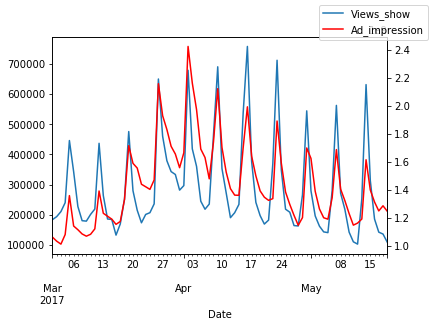

In [ ]:
# plot for Date vs Views_show and days vs Ad_impressions
ax = media.plot(x="Date", y="Views_show", legend=False)
ax2 = ax.twinx()
media.plot(x="Date", y="Ad_impression", ax=ax2, legend=False, color="r")
ax.figure.legend()

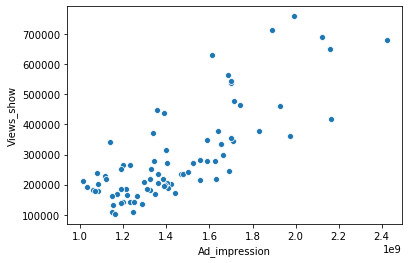

In [ ]:
sns.scatterplot(data = media, x = 'Ad_impression', y = 'Views_show')

There is a positive correlation between Views and Ad Impressions

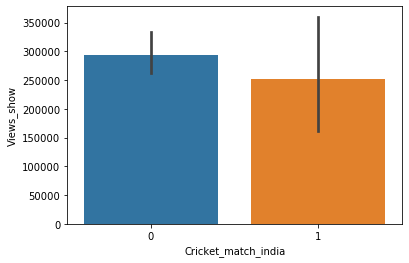

In [ ]:
sns.barplot(data = media,x='Cricket_match_india', y='Views_show')

Show views slightly declines when there is a cricket match.

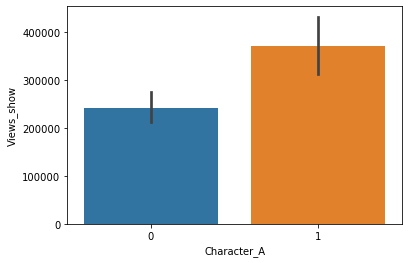

In [ ]:
sns.barplot(data = media,x='Character_A', y='Views_show')

Presence of Character A improves the show viewership.

In [ ]:
# Rescaling the Features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['Views_show','Visitors','Views_platform','Ad_impression']

media[num_vars] = scaler.fit_transform(media[num_vars])

In [ ]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day_of_week,weekend
0,2017-03-01,0.123787,0.010985,0.011466,0.035372,0,0,2,0
1,2017-03-02,0.139066,0.020409,0.000000,0.014844,0,0,3,0
2,2017-03-03,0.164544,0.000000,0.025792,0.000000,0,0,4,0
3,2017-03-04,0.209631,0.223199,0.119842,0.048345,1,0,5,1
4,2017-03-05,0.523988,0.316041,0.255290,0.245426,0,0,6,1


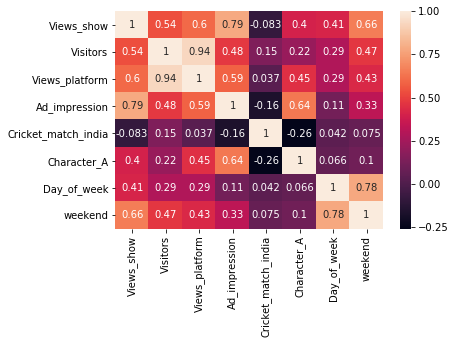

In [ ]:
sns.heatmap(media.corr(),annot = True)

- Strong correlation between Views and Ad Impressions
- Weekend and Views also show strong positive correlation
- Number of visitors and Views also show correlation

In [ ]:
# Let's drop 'Date' - we've already gathered information into Days of week and Weekend
media = media.drop('Date',axis = 1)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(media.drop("Views_show", axis=1), media['Views_show'], test_size = 0.2,\
                                                    random_state=123)

In [ ]:
xtrain = sm.add_constant(xtrain)
xtest = sm.add_constant(xtest)

In [ ]:
model1 = sm.OLS(ytrain, xtrain).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     41.04
Date:                Wed, 28 Jun 2023   Prob (F-statistic):           8.44e-20
Time:                        14:20:02   Log-Likelihood:                 59.883
No. Observations:                  64   AIC:                            -103.8
Df Residuals:                      56   BIC:                            -86.50
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0386    

In [ ]:
xtrain = xtrain.drop(['Cricket_match_india'], axis=1)
model2 = sm.OLS(ytrain, xtrain).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     48.74
Date:                Wed, 28 Jun 2023   Prob (F-statistic):           1.15e-20
Time:                        14:22:06   Log-Likelihood:                 59.883
No. Observations:                  64   AIC:                            -105.8
Df Residuals:                      57   BIC:                            -90.65
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0386      0.040      0.

In [ ]:
xtrain = xtrain.drop(['Day_of_week'], axis=1)
model3 = sm.OLS(ytrain, xtrain).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     58.59
Date:                Wed, 28 Jun 2023   Prob (F-statistic):           2.05e-21
Time:                        14:22:53   Log-Likelihood:                 59.464
No. Observations:                  64   AIC:                            -106.9
Df Residuals:                      58   BIC:                            -93.98
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0153      0.029      0.

final model - model3 - with all statistically significant variables

In [ ]:
xtest = xtest.drop(['Cricket_match_india','Day_of_week'], axis=1)

In [ ]:
predictions = model3.predict(xtest)

print('R2  is '+str(r2_score(ytest, predictions)))
print('MSE is '+str(mean_squared_error(ytest, predictions)))
print('MAE is '+str(mean_absolute_error(ytest, predictions)))

R2  is 0.7577807819972067
MSE is 0.012265442085691657
MAE is 0.08945367241470906


As observed, number of visitors, number of views on the platform, ad impressions, presence of character A and the day being a weekend all have an impact on the Views.
We have performed EDA to observe patterns.
We have also created an OLS model in which the above variables showed statistical significance.

In [ ]:
### end of the notebook.